In [1]:
import pandas as pd

In [12]:
df=pd.read_json("data_array.json")
m=df["Name"].unique().tolist()

In [13]:
type(m)

list

In [4]:
!pip install graphviz

In [3]:
from graphviz import Digraph

def generate_langgraph_architecture():
    g = Digraph('LangGraph_Agent', format='png')
    g.attr(rankdir='LR', splines='ortho', bgcolor='white')

    # Cluster: ChatBot Core
    with g.subgraph(name='cluster_chatbot') as cb:
        cb.attr(label='ChatBot Orchestrator', style='filled', color='lightgrey')
        cb.node('llm', 'LLM (Language Model)', shape='box')
        cb.node('parser', 'Output Parser', shape='box')
        cb.node('response_chains', 'Response Chains', shape='box')
        cb.node('agents', 'Agents (e.g. ExpenseAgent)', shape='box')
        cb.node('history', 'History Buffer', shape='box')
        cb.node('state', 'Current State', shape='box')
        cb.edges([
            ('llm', 'parser'),
            ('parser', 'response_chains'),
            ('response_chains', 'agents'),
            ('agents', 'state'),
            ('state', 'history')
        ])

    # Cluster: LangGraph Pipeline
    with g.subgraph(name='cluster_graph') as lg:
        lg.attr(label='LangGraph Flow', style='filled', color='lightblue')
        lg.node('classify', 'classify_action_node\n→ extract_action()', shape='box')
        lg.node('extract', 'extract_data_node\n→ merchant_date(), ExpenseAgent.extract_data()', shape='box')
        lg.node('generate', 'generate_node\n→ LLM Response / Add Expense', shape='box')
        lg.edge('classify', 'extract')
        lg.edge('extract', 'generate')

    # External components
    g.node('user', 'User Query', shape='ellipse', style='filled', color='lightyellow')
    g.node('df', 'DataFrame (Transaction Data)', shape='cylinder', color='grey')
    g.node('utils', 'utils / utils2\n(extract_action, extraction_chain, match_merchant_name)', shape='note', color='lightgreen')

    # Connect flow
    g.edge('user', 'classify')
    g.edge('generate', 'llm')
    g.edge('extract', 'df')
    g.edge('classify', 'utils', label='action detection')
    g.edge('extract', 'utils', label='merchant/date parsing')
    g.edge('generate', 'history', label='append response')

    # Final output
    g.node('response', 'Final Response to User', shape='ellipse', style='filled', color='lightyellow')
    g.edge('generate', 'response')

    g.render('langgraph_agent_architecture', cleanup=True)
    print("✅ Architecture diagram generated: langgraph_agent_architecture.png")

generate_langgraph_architecture()


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [7]:
!pip install langgraph

  Using cached langgraph_sdk-0.2.9-py3-none-any.whl.metadata (1.5 kB)
Using cached langgraph_sdk-0.2.9-py3-none-any.whl (56 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.72
    Uninstalling langchain-core-0.3.72:
      Successfully uninstalled langchain-core-0.3.72
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [langgraph]/6 [langgraph]core]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.
langchain-community 0.3.27 requires langchain-core<1.0.0,>=0.3.66, but you have langchain-core 1.0.3 which is incompatible.
langchain-groq 0.3.6 requires langchain-core<1.0.0,>=0.3.68, but you have langchain-core 1.0.3 which is incompatible.
langchain-text-splitters 0.3.9 requires langchain-core<1.0.0,>=0.3.72, but 

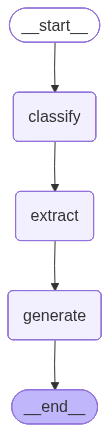

In [10]:
# --- Import LangGraph ---
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Optional, Any, Dict

# --- Dummy State ---
class ChatState(TypedDict):
    query: str
    action: Optional[str]
    response: Optional[str]

# --- Filler Node Functions ---
def classify_action_node(state: ChatState) -> ChatState:
    print("→ classify_action_node called")
    state["action"] = "expenses"
    return state

def extract_data_node(state: ChatState) -> ChatState:
    print("→ extract_data_node called")
    state["response"] = "Data extracted for merchant/date"
    return state

def generate_node(state: ChatState) -> ChatState:
    print("→ generate_node called")
    state["response"] = f"Generated response for {state.get('action')}"
    return state

# --- Build the Graph ---
graph = StateGraph(ChatState)

# Add nodes
graph.add_node("classify", classify_action_node)
graph.add_node("extract", extract_data_node)
graph.add_node("generate", generate_node)

# Add edges (flow)
graph.add_edge(START, "classify")
graph.add_edge("classify", "extract")
graph.add_edge("extract", "generate")
graph.add_edge("generate", END)

# Compile the graph
graph.compile()

# --- Display the Graph Diagram ---
# (This renders directly inside a Jupyter notebook)
# compiled.get_graph().draw("langgraph_architecture.png")

# from IPython.display import Image
# Image(filename="langgraph_architecture.png")
